In [1]:
import torchaudio
from speechbrain.pretrained import EncoderClassifier
import pandas as pd
import seaborn as sn
from sklearn import metrics
from datetime import datetime

In [2]:
province_code = EncoderClassifier.from_hparams(
    source="pretrained-model-src", 
    savedir="pretrained-model-save"
)

In [3]:
signal = province_code.load_audio("/data/MTDATA/fn-2-018/root/person/st/gw/collectorgw88/st_set1_collectorgw88_speakergw407_8_11.wav")
prediction =  province_code.classify_batch(signal)
print(prediction)

(tensor([[-2.7466e-03, -7.1326e+00, -6.3663e+00, -8.3966e+00]]), tensor([-0.0027]), tensor([0]), ['gw: 강원'])


In [4]:
signal = province_code.load_audio("/data/MTDATA/fn-2-018/root/person/st/gs/collectorgs31/st_set2_collectorgs31_speakergs98_68_6.wav")
prediction =  province_code.classify_batch(signal)
print(prediction)

(tensor([[-1.5945e+01, -3.4148e-04, -8.1697e+00, -9.7523e+00]]), tensor([-0.0003]), tensor([1]), ['gs: 경상'])


In [5]:
signal = province_code.load_audio("/data/MTDATA/fn-2-018/root/person/st/jl/collectorjl20/st_set3_collectorjl20_speakerjl218_31_12.wav")
prediction =  province_code.classify_batch(signal)
print(prediction)

(tensor([[-3.4452, -6.1406, -0.0613, -3.6723]]), tensor([-0.0613]), tensor([2]), ['jl: 전라'])


In [6]:
signal = province_code.load_audio('/data/MTDATA/fn-2-018/root/person/st/jj/collectorjj10/st_set1_collectorjj10_speakerjj13_81_10.wav')
prediction =  province_code.classify_batch(signal)
print(prediction)

(tensor([[-0.3828, -7.7525, -1.3332, -2.9195]]), tensor([-0.3828]), tensor([0]), ['gw: 강원'])


In [7]:
signal = province_code.load_audio('/data/MTDATA/fn-2-018/root/person/st/cc/collectorcc46/st_set1_collectorcc46_speakercc308_46_7.wav')
prediction =  province_code.classify_batch(signal)
print(prediction)

(tensor([[-1.4590e+01, -1.2951e+01, -1.5177e+01, -3.0994e-06]]), tensor([-3.0994e-06]), tensor([3]), ['cc: 충청'])


In [ ]:
print(prediction[1].exp())

In [ ]:
print(prediction[3])

In [ ]:
emb =  province_code.encode_batch(signal)

In [ ]:
print(emb.shape)

In [8]:
test_data = '../classifier_data/test.csv'
test_df = pd.read_csv(test_data)
test_df = test_df[['wav', 'province_code']]

In [ ]:
test_df

In [9]:
# province_code_list = ['gw', 'gs', 'jl', 'jj', 'cc']
province_code_list = ['gw', 'gs', 'jl', 'cc']

In [11]:
province_code_list.index('cc')

3

In [12]:
test_df['province_id'] = test_df.apply(lambda x : province_code_list.index(x['province_code']), axis=1)

In [13]:
test_df

,wav,province_code,province_id
0,/data/MTDATA/fn-2-018/root/person/st/gw/collec...,gw,0
1,/data/MTDATA/fn-2-018/root/person/st/gw/collec...,gw,0
2,/data/MTDATA/fn-2-018/root/person/st/gw/collec...,gw,0
3,/data/MTDATA/fn-2-018/root/person/st/gw/collec...,gw,0
4,/data/MTDATA/fn-2-018/root/person/st/gw/collec...,gw,0
...,...,...,...
6795,/data/MTDATA/fn-2-018/root/person/st/cc/collec...,cc,3
6796,/data/MTDATA/fn-2-018/root/person/st/cc/collec...,cc,3
6797,/data/MTDATA/fn-2-018/root/person/st/cc/collec...,cc,3
6798,/data/MTDATA/fn-2-018/root/person/st/cc/collec...,cc,3


In [14]:
def get_province_id(file):
    signal = province_code.load_audio(file)
    prediction =  province_code.classify_batch(signal)
    return int(prediction[2])

In [15]:
start_time = datetime.now()
test_df['hyp'] = test_df.apply(lambda x : get_province_id(x['wav']), axis=1)
datetime.now() - start_time

datetime.timedelta(seconds=308, microseconds=490991)

In [ ]:
test_df

In [16]:
confusion_matrix = pd.crosstab(test_df['province_id'], test_df['hyp'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted     0     1     2     3
Actual                           
0          1167   328   112    93
1            13  1645    36     6
2            29    12  1554   105
3            46    13   219  1422


In [ ]:
confusion_matrix.columns

In [ ]:
confusion_matrix.describe            

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

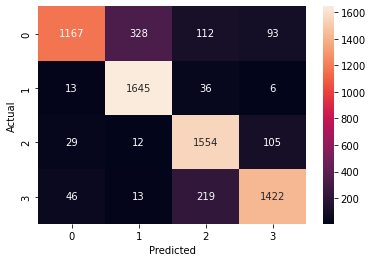

In [17]:
sn.heatmap(confusion_matrix, annot=True, fmt="d")

In [18]:
Accuracy = metrics.accuracy_score(test_df['province_id'], test_df['hyp'])
Accuracy

0.8511764705882353